Importing Dependencies

In [ ]:
# importing necessaries libraries
# LOGISTIC REGRESSION
# 1 numpy libraries used to make numpy arrays

# 2 pandas is used to create dataframes and data frames are
#   structured table . Loading data in to data frames is  easier to analyze
#   the data and process the data.

# 3 matplotlib and seaborn libraries are data visulization libraries as they
#   are very useful.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing data into data frames

In [ ]:
#loading data  from  csv file to pandas dataframe

df=pd.read_csv("Titanic_Data.csv")

In [ ]:
#printing First five rows of dataframe
# In Survived 0  represents the person did not survive
# and 1 represents the person is survived

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#  calculating the number of rows and columns in the data frame

df.shape

(418, 12)

In [ ]:
#from pandas.core.reshape.encoding import DataFrame
# printing all information about the data
# In  the dataframe  the class is pandas.core.frame.DataFrame
# and the 418 rows and 12 columns .and starting index is 0 and end index is
# 417 and shows the Data types of each columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# printing the number of missing values in the data frame

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Handling Missing Values

In [ ]:
# Dropping  Cabin  Column from  the data frame
#For Deleting columns we have to write  another parameter i.e axis .
#the axis=0 represents the dropping a rows and
#axis=1 represents the Dropping a columns.

df=df.drop(columns='Cabin',axis=1)

In [ ]:
# filling all missing values  of Age column by mean
#inplace = True is use to saved in  our Original data frame
# if we not write inplace=True then it not be saved in original data frame

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [ ]:
# After Dropping Missing values to check Again

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# After dropping Missing Values

df.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Embarked       418
dtype: int64

In [ ]:
# Duplicate Rows

duplicate_rows_df=df[df.duplicated()]
print("Number of duplicate rows : ",duplicate_rows_df)

Number of duplicate rows :  Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


In above there is no  DUPLICATE ROWS .Therfore it  shows the Empty DataFrame.

Data Analysis


In [ ]:
df['Age'].astype(int)

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    30
417    30
Name: Age, Length: 418, dtype: int64

In [ ]:
df['Survived'].astype(object)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: object

In [ ]:
# df.describe() use to find all calculations of all columns
# it shows the Count,mean,std(standard Deviation),min,max

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#counting the number of people who Survived or not survived

df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

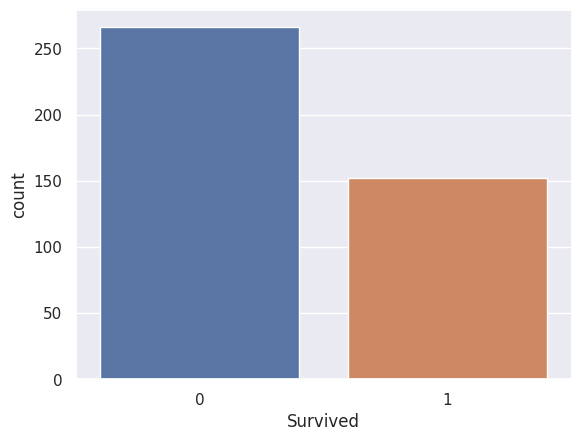

In [ ]:
#plotting a countplot of Survived  using Seaborn libraries .
sns.countplot(x='Survived',data=df)

In Above graph  the people Not Survived has  250 plus more count and survied has 150 count.

In [ ]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

[Text(0.5, 1.0, 'Visulization of Survived or Not Survived on the basis of Gender')]

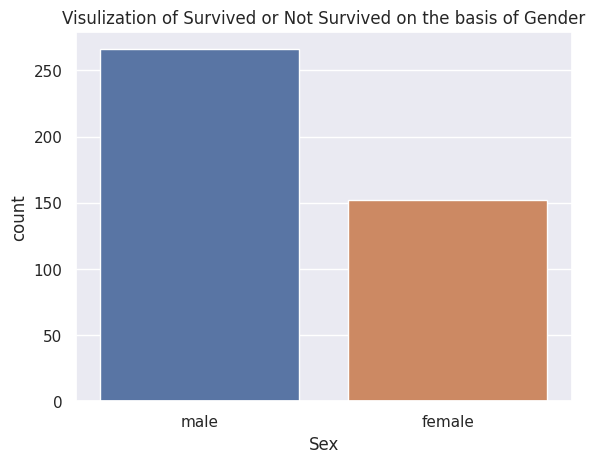

In [ ]:
sns.countplot(x='Sex',data=df).set (title="Visulization of Survived or Not Survived on the basis of Gender")

<Axes: xlabel='Sex', ylabel='Count'>

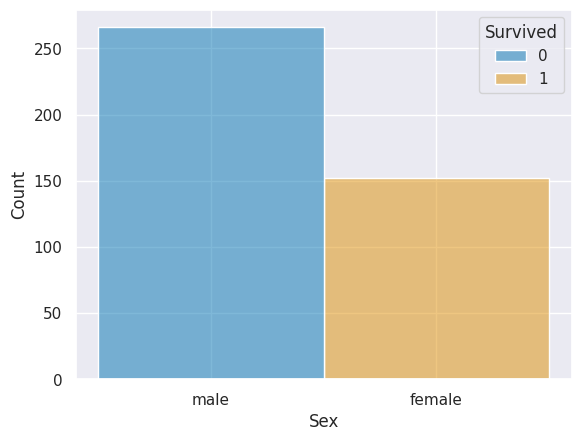

In [ ]:
sns.histplot(data=df, x='Sex', hue='Survived',palette="colorblind")

<Axes: xlabel='Pclass', ylabel='count'>

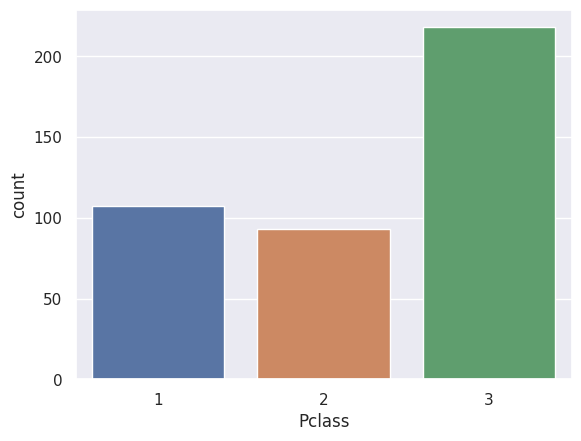

In [ ]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

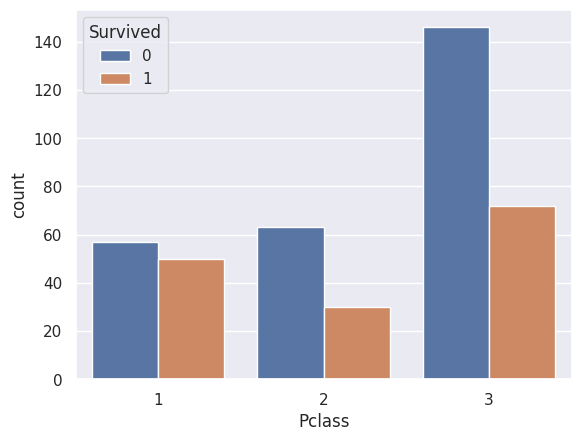

In [ ]:
sns.countplot(x='Pclass',hue='Survived', data=df)

above we ploted a countplot of Pclass and Survived.
In above blue represents the Not Survived
and orange represents the Survived .

Encoding the CategoricalcColumns

In [ ]:
#counting the number of male and female

df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
# replacing  the categorical  data to numeric

df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Seperating Features and Target

In [ ]:
x=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']


In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
# with the help of sklearn library we selecting
# model and them importing train_test_split

# 2  with the help of sklearn library  we using linear model
# and with the help of  linear  model we importing LogisticRegression

# 3   after  that we importing accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

training data and splitting data and testing data

In [ ]:
# # creating four arrays x_train,x_test,y_train,y_test.
# we taking x values and seperating it or splitting it into
# training data  and testing data  the x values are splitted into
# two arrays named as x_train,x_test.
# all the y value corresponding to this x train will be stored in y train.
# Due to this x and y  will be splitted in to two datasets . due to this
# x and y  are interlinked .

# 0.2 represents 20 percentage that means 20 percentage of data is x_test data.
# 80 percents of data goes to x train


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(418, 7) (334, 7) (84, 7)


Model Training

Logistic Regression

Y=1/1+e^-Z

In [ ]:
model=LogisticRegression()

In [ ]:
# Training Logistic Regression  model with training data

model.fit(x_train,y_train)

LogisticRegression()

Model Evaluation.

Accuracy Score

In [ ]:
# Accuracy on training data

x_train_prediction=model.predict(x_train)

In [ ]:
# Here 1 represents the person is survived and 0 represents not survived.

print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [ ]:
#accuracy on test data

y_test_prediction=model.predict(x_test)
print(y_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [ ]:
print(classification_report(y_train,x_train_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       119

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



In [ ]:
train_accuracy=accuracy_score(y_train,x_train_prediction)
print(train_accuracy)

1.0


In [ ]:
test_accuracy=accuracy_score(y_test,y_test_prediction)*100
print(test_accuracy)

100.0


In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


Taking User Input .

In [ ]:
def User_Evaluation():
  Pclass=int(input("Enter the Pclass : "))
  Sex=int(input("Enter the Sex : "))
  Age=int(input('Enter Age : '))
  Sibsp= int(input("Enter the Sibsp : "))
  Parch=int(input("Enter the Parch : "))
  Fare=float(input("Enter the Fare : "))
  Embarked=int(input("Enter the  Embarked : "))
  return([[Pclass,Sex,Age,Sibsp,Parch,Fare,Embarked]])

In [ ]:

new_x=User_Evaluation()
pred=model.predict(new_x)
if pred==1:
  print('The Person is Survived.')
else :
  print("The Person is not Survived.")

Enter the Pclass : 3
Enter the Sex : 1
Enter Age : 25
Enter the Sibsp : 2
Enter the Parch : 1
Enter the Fare : 2.4589
Enter the  Embarked : 2
The Person is Survived.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
